In [1]:
%load_ext autoreload
%autoreload 2

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from discreteenvironment import DiscreteEnvironment
from dataset import DataObject

In [44]:
opt = np.get_printoptions()
np.set_printoptions(threshold=np.inf)

In [45]:
env = DiscreteEnvironment()
start, goal, traj = env.generateTrajectory()
print (str.format('start :{}', start))
print (str.format('goal :{}', goal))
print ('Steps of trajectory : [x_t  u_t  x_t+1]')
print (traj)

start :[19 10]
goal :[ 7 12]
Steps of trajectory : [x_t  u_t  x_t+1]
[[19 10 -1  0 18 10]
 [18 10 -1  0 17 10]
 [17 10 -1  0 16 10]
 [16 10 -1  0 15 10]
 [15 10 -1  0 14 10]
 [14 10 -1  0 13 10]
 [13 10 -1  0 12 10]
 [12 10 -1  0 11 10]
 [11 10 -1  0 10 10]
 [10 10 -1  0  9 10]
 [ 9 10 -1  1  8 11]
 [ 8 11 -1  1  7 12]]


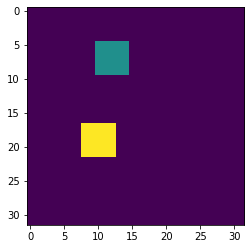

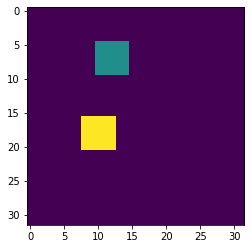

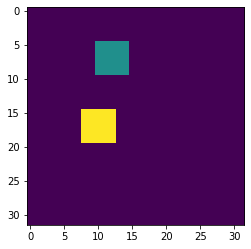

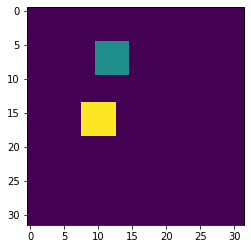

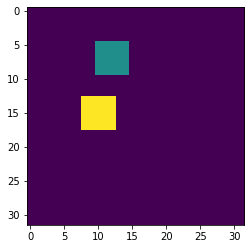

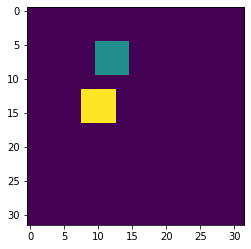

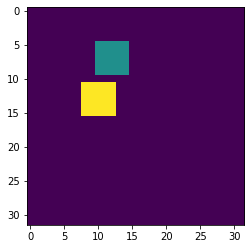

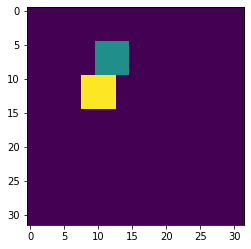

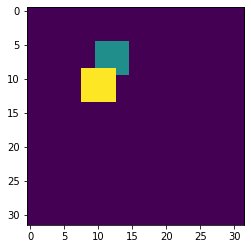

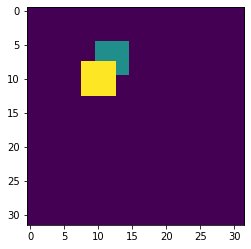

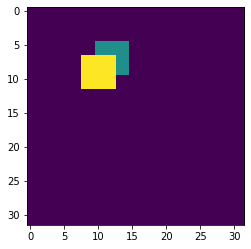

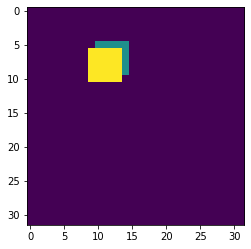

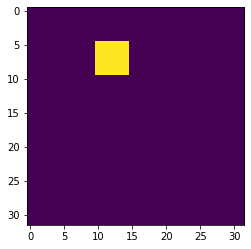

In [46]:
for i in range(len(traj)):
    img = env.generateImage(traj[i, 0:2], goal)
    fig = plt.figure()
    plt.imshow(img)
    plt.show()
    
img = env.generateImage(traj[len(traj)-1, 4:], goal)
fig = plt.figure()
plt.imshow(img)
plt.show()

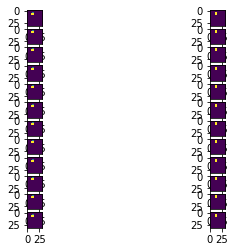

In [47]:
fig = plt.figure()
rows = len(traj)
for r in range(rows):
    plt.subplot(rows,2,r*2 + 1)
    plt.imshow(env.generateImage(traj[i, :2], goal))
    plt.subplot(rows,2,r*2 + 2)
    plt.imshow(env.generateImage(traj[i, 4:], goal))

In [55]:
# data sample = x_t, y_t, I_t, u_t, x_t+1, y_t+1, I_t+1
def generate_trajectory_data(no_of_trajectories):
    buffer_size = no_of_trajectories * 10
    x_dim = 2
    y_dim = 2
    I_dim = 32 * 32
    u_dim = 2
    total_sequence_dim = 2 * (x_dim + y_dim + I_dim) + u_dim
    dIndex = 0
    data = np.zeros((buffer_size, total_sequence_dim))
    env = DiscreteEnvironment()
    for i in range(no_of_trajectories):
        start, goal, traj = env.generateTrajectory()
        for j in range(len(traj)):
            do = DataObject.from_values_sequence(traj[j, :2].reshape(-1, 1),
                                                 goal.reshape(-1,1),
                                                 env.generateImage(traj[j, :2], goal).reshape(-1, 1),
                                                 traj[j, 2:4].reshape(-1, 1),
                                                 traj[j, 4:].reshape(-1, 1),
                                                 goal.reshape(-1,1),
                                                 env.generateImage(traj[j, 4:], goal).reshape(-1, 1))
            data[dIndex] = do.rawData.reshape(1, -1)
            dIndex += 1
            if dIndex == len(data):
                data = np.concatenate((data, np.zeros((buffer_size, total_sequence_dim))), axis=0)
    data = data[:dIndex]
    return data

In [56]:
seq_samples = generate_trajectory_data(3)

In [57]:
print (seq_samples.shape)

(36, 2058)


In [58]:
print (seq_samples[:, 0:4])

[[25. 12. 10.  9.]
 [24. 12. 10.  9.]
 [23. 12. 10.  9.]
 [22. 12. 10.  9.]
 [21. 12. 10.  9.]
 [20. 12. 10.  9.]
 [19. 12. 10.  9.]
 [18. 12. 10.  9.]
 [17. 12. 10.  9.]
 [16. 12. 10.  9.]
 [15. 12. 10.  9.]
 [14. 12. 10.  9.]
 [13. 12. 10.  9.]
 [12. 11. 10.  9.]
 [11. 10. 10.  9.]
 [25. 19. 18.  9.]
 [25. 18. 18.  9.]
 [25. 17. 18.  9.]
 [25. 16. 18.  9.]
 [24. 15. 18.  9.]
 [23. 14. 18.  9.]
 [22. 13. 18.  9.]
 [21. 12. 18.  9.]
 [20. 11. 18.  9.]
 [19. 10. 18.  9.]
 [20. 25.  9. 20.]
 [19. 25.  9. 20.]
 [18. 25.  9. 20.]
 [17. 25.  9. 20.]
 [16. 25.  9. 20.]
 [15. 25.  9. 20.]
 [14. 25.  9. 20.]
 [13. 24.  9. 20.]
 [12. 23.  9. 20.]
 [11. 22.  9. 20.]
 [10. 21.  9. 20.]]


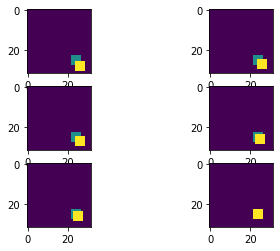

In [52]:
fig = plt.figure()
rows = 3
do = DataObject(2,2,32*32,2)
do.fill_from_array(seq_samples)
for r in range(rows):
    plt.subplot(rows,2,r*2 + 1)
    plt.imshow(do.I[r].reshape((32, 32)))
    plt.subplot(rows,2,r*2 + 2)
    plt.imshow(do.In[r].reshape((32, 32)))

In [53]:
d = DataObject(2,2,32*32,2)
d.fill_from_array(seq_samples[3, :].reshape(1, -1))
print (d.x)
print (d.y)
print (d.u)
print (d.xn)
print (d.yn)
print (d.I)
print (d.In)

[[25. 21.]]
[[10.  7.]]
[[-1.  0.]]
[[24. 21.]]
[[10.  7.]]
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    

In [59]:
root_folder = 'data/demoplanner/version1/'

train_samples = generate_trajectory_data(1000)
np.savetxt(root_folder+'train.csv', train_samples, fmt="%5.1f", delimiter=",")
print ('Training data generated')

test_samples = generate_trajectory_data(100)
np.savetxt(root_folder+'test.csv', test_samples, fmt="%5.1f", delimiter=",")
print ('Test data generated')

Training data generated
Test data generated


In [60]:
print (train_samples.shape)
print (test_samples.shape)

(13280, 2058)
(1341, 2058)


In [10]:
np.set_printoptions(**opt)